# Machine Learning Prediction Of Employee Turnover

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Libraries

In [2]:
import pandas as pd #Pandas is a library used for the data manipulation and analyis in python
import numpy as np # Numpy is used to solve the mathematical computational problems
import seaborn as sns #It is used as the visualization library that improves matplotlib and gives higher level interface
from matplotlib import pyplot as plt #It is using for the wide range of visualizations techniques.

In [3]:
dataFrame = pd.read_csv('/content/drive/MyDrive/dataset.csv') #Reading the csv file and storing the data in "dataFrame" variable
dataFrame.head() #It displays the top 5 data in a dataset

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [4]:
dataFrame.tail() #It displays the last 5 data in the given dataset

satisfaction_level  last_evaluation  number_project  \
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
14994                   151                   3              0     1   
14995                   160                   3              0     1   
14996                   143                   3              0     1   
14997                   280                   4              0     1   
14998                   158                   3              0     1   

       promotion_last_5years    sales salary  
14994                      0  support    low  
14995                      0  support    low  
14996                      0  support    low  
14997                      0  support    low  
14998                      0  support    low

In [5]:
dataFrame.shape # It results of how many rows and columns exist in a dataset

(14999, 10)

In [6]:
dataFrame.columns # It represents all attributes in the dataset

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [7]:
dataFrame.isna().sum() #It is used to detect the missing or Nan values in dataset

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [8]:
dataFrame.duplicated(keep="first").sum() #It counts the duplicate rows in the dataframe

3008

In [9]:
dataFrame.drop_duplicates(inplace=True) #It removes all the duplicate rows we got in the above

In [10]:
dataFrame.shape #It returns the new dataFrame rows and columns

(11991, 10)

In [11]:
dataFrame.info() #It describes the information about the attributes like datatypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   sales                  11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


## Exploratory Data Analysis

### Monthly Hours

In [12]:
dataFrame["average_montly_hours"].unique() # It represents all the unique values present in the average_monthly_hours

array([157, 262, 272, 223, 159, 153, 247, 259, 224, 142, 135, 305, 234,
       148, 137, 143, 160, 255, 282, 147, 304, 139, 158, 242, 239, 128,
       132, 294, 134, 145, 140, 246, 126, 306, 152, 269, 127, 281, 276,
       182, 273, 307, 309, 225, 226, 308, 244, 286, 161, 264, 277, 275,
       149, 295, 151, 249, 291, 232, 130, 129, 155, 265, 279, 284, 221,
       154, 150, 267, 257, 177, 144, 289, 258, 263, 251, 133, 216, 300,
       138, 260, 183, 250, 292, 283, 245, 256, 278, 240, 136, 301, 243,
       296, 274, 164, 146, 261, 285, 141, 297, 156, 287, 219, 254, 228,
       131, 252, 236, 270, 298, 192, 248, 266, 238, 229, 233, 268, 231,
       253, 302, 271, 290, 235, 293, 241, 218, 199, 180, 195, 237, 227,
       172, 206, 181, 217, 310, 214, 198, 211, 222, 213, 202, 184, 204,
       288, 220, 299, 303, 212, 196, 179, 205, 230, 203, 280, 169, 188,
       178, 175, 166, 163, 168, 165, 189, 162, 215, 193, 176, 191, 174,
       201, 208, 171, 111, 104, 106, 100, 194, 209, 185, 200, 20

In [13]:
bins = len(dataFrame["average_montly_hours"].unique())  # It finds the length of duplicate values contains in the average_monthly_hours attribute
bins

215

In [14]:
sns.histplot??

In [15]:
plt.figure(figsize=(6, 6))
sns.histplot(data = dataFrame, x = dataFrame["average_montly_hours"], kde=True) # Plotting the histogram graph for the average monthly hours column
plt.tight_layout()
plt.show()

### Number Of Projects

In [16]:
dataFrame["number_project"].value_counts() #Unique values in the number of projects columns

4    3685
3    3520
5    2233
2    1582
6     826
7     145
Name: number_project, dtype: int64

In [17]:
plt.figure(figsize=(6, 6))
sns.countplot(data=dataFrame, x="number_project") # X- axis as the number of projects
plt.title("Number Of Projects Undertaken Rate")
plt.tight_layout()
plt.show() #Plotting the countplot graph

### Promotion Made In The Last 5 Years

In [18]:
dataFrame["promotion_last_5years"].value_counts() # It displays the all duplicate values in the promotion of last 5 years

0    11788
1      203
Name: promotion_last_5years, dtype: int64

In [19]:
labels = dataFrame["promotion_last_5years"].value_counts().index.tolist() # The values we got in the above are o,1 and converted into list so that labelling is easy to understand
labels

[0, 1]

In [20]:
labels = ["Promoted" if i == 1 else "Not Promoted" for i in labels] # Encoding 0, 1 to Promoted and not promoted
labels

['Not Promoted', 'Promoted']

In [21]:
plt.figure(figsize=(6, 6))
plt.pie(x = dataFrame["promotion_last_5years"].value_counts(), labels=labels, autopct="%1.2f%%", explode=[0, 0.3]) #Plotting the pie chart for the who got promotion in last 5 years with uniwue members
plt.title("Promotion In The Last Five Years")
plt.tight_layout()
plt.show()

### Work Accidents

In [22]:
dataFrame["Work_accident"].value_counts() #Returning unique values in the work accident

0    10141
1     1850
Name: Work_accident, dtype: int64

In [23]:
labels = dataFrame["Work_accident"].value_counts().index.tolist() # And the unique values will represent in the work accident that converts to list as zeros and one.
labels

[0, 1]

In [24]:
labels = ["Work Accident" if i == 1 else "No Work Accident" for i in labels] #It represents the list as the work accident or Not work accident in the list
labels

['No Work Accident', 'Work Accident']

In [25]:
plt.figure(figsize=(6, 6))
plt.pie(x = dataFrame["Work_accident"].value_counts(), labels=labels, autopct="%1.2f%%", explode=[0, 0.1]) #It plots the pie chart with work accident column that to promoted or Not promoted
plt.title("Work Accident")
plt.tight_layout()
plt.show()

### Time Spent In Company

In [26]:
dataFrame["time_spend_company"].value_counts() #It displays the unique values in the time spent in a single company

3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: time_spend_company, dtype: int64

In [27]:
labels = dataFrame["time_spend_company"].value_counts().index.tolist() #That lists the time spend comapany with unique values in the column
labels

[3, 2, 4, 5, 6, 10, 7, 8]

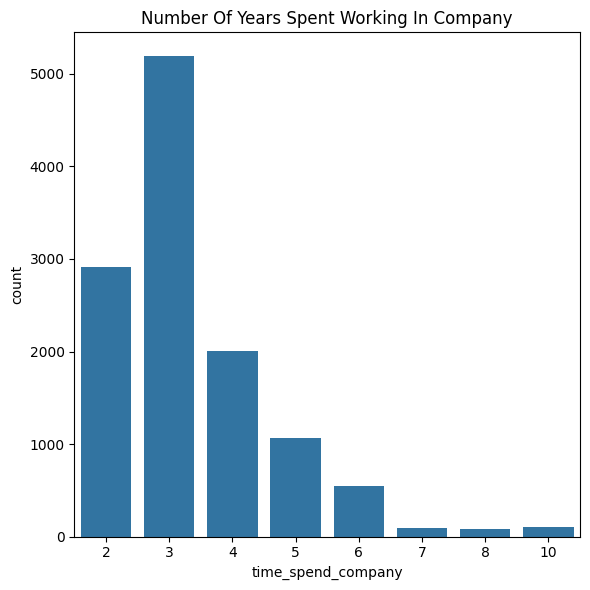

In [28]:
plt.figure(figsize=(6, 6))
sns.countplot(x = "time_spend_company", data=dataFrame) # Plotting the countplot in the time spent in the company with the x axis as the time spent company and Y-axis as the count
plt.title("Number Of Years Spent Working In Company")
plt.tight_layout()
plt.show()

In [29]:
dataFrame["time_spend_company"].mean() # Finding the mean for the time spent company for the dataFrame

3.3648569760653824

### Department Comparison

In [30]:
dataFrame["sales"].unique() #Finding the unique names in the sales column that says the strings in the list

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [31]:
dataFrame["sales"].value_counts() #Finding the unique values in the sales column represents the datatypes

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: sales, dtype: int64

In [32]:
plt.figure(figsize=(6, 6))
sns.countplot(x = "sales", data=dataFrame) #plotting the countplot for the x as sales and y as the counting the values for the Number of eployees in the department
plt.title("Number Of Employees Per Department")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [33]:
dataFrame["salary"].unique() #Finding the unique values in the salary that says low high and medium

array(['low', 'medium', 'high'], dtype=object)

In [34]:
dataFrame["salary"].value_counts() #Counting the unique values in the salary for low, medium and high salary persons in the salary column

low       5740
medium    5261
high       990
Name: salary, dtype: int64

In [35]:
labels = dataFrame["salary"].value_counts().index.tolist() # Storing the salaries in the list for the salary column
labels

['low', 'medium', 'high']

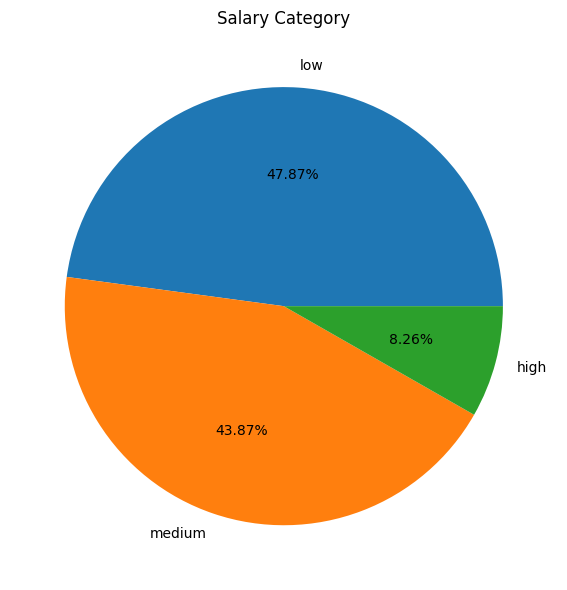

In [36]:
plt.figure(figsize=(6, 6))
plt.pie(x = dataFrame["salary"].value_counts(), labels=labels, autopct="%1.2f%%") #Plotting the pie chart as the distributing of low, medium and high separables in the salary in the salary column
plt.title("Salary Category")
plt.tight_layout()
plt.show()

## Data Preprocessing

In [37]:
#Renaming the sales to department and salary leve to salary level for encoding easy
dataFrame.rename(columns={"sales": "department", "salary_leve": "salary_level"}, inplace=True)

In [38]:
dataFrame.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Categorical Encoding

In [39]:
categorical_cols = ["department", "salary"]
encoded_cols = pd.get_dummies(dataFrame[categorical_cols], prefix="cat")

In [40]:
encoded_cols

cat_IT  cat_RandD  cat_accounting  cat_hr  cat_management  \
0           0          0               0       0               0   
1           0          0               0       0               0   
2           0          0               0       0               0   
3           0          0               0       0               0   
4           0          0               0       0               0   
...       ...        ...             ...     ...             ...   
11995       0          0               0       0               1   
11996       0          0               0       0               1   
11997       0          0               0       0               1   
11998       0          0               0       0               0   
11999       1          0               0       0               0   

       cat_marketing  cat_product_mng  cat_sales  cat_support  cat_technical  \
0                  0                0          1            0              0   
1                  0                0          1            0              0   
2                  0                0          1            0              0   
3                  0                0          1            0              0   
4                  0                0          1            0              0   
...              ...              ...        ...          ...            ...   
11995              0                0          0            0              0   
11996              0                0          0            0              0   
11997              0                0          0            0              0   
11998              1                0          0            0              0   
11999              0                0          0            0              0   

       cat_high  cat_low  cat_medium  
0             0        1           0  
1             0        0           1  
2             0        0           1  
3             0        1           0  
4             0        1           0  
...         ...      ...         ...  
11995         1        0           0  
11996         1        0           0  
11997         1        0           0  
11998         1        0           0  
11999         0        1           0  

[11991 rows x 13 columns]

In [41]:
dataFrame = dataFrame.join(encoded_cols)

In [42]:
dataFrame.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  ...  cat_hr  cat_management  cat_marketing  cat_product_mng  \
0     low  ...       0               0              0                0   
1  medium  ...       0               0              0                0   
2  medium  ...       0               0              0                0   
3     low  ...       0               0              0                0   
4     low  ...       0               0              0                0   

   cat_sales  cat_support  cat_technical  cat_high  cat_low  cat_medium  
0          1            0              0         0        1           0  
1          1            0              0         0        0           1  
2          1            0              0         0        0           1  
3          1            0              0         0        1           0  
4          1            0              0         0        1           0  

[5 rows x 23 columns]

In [43]:
dataFrame.drop(["department", "salary"], inplace=True, axis="columns")

In [44]:
dataFrame.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'cat_IT', 'cat_RandD', 'cat_accounting',
       'cat_hr', 'cat_management', 'cat_marketing', 'cat_product_mng',
       'cat_sales', 'cat_support', 'cat_technical', 'cat_high', 'cat_low',
       'cat_medium'],
      dtype='object')

### Min Max Scaling

In [45]:
dataFrame["average_montly_hours"].min() # Minimum value in the average monthly hours

96

In [46]:
dataFrame["average_montly_hours"].max() # Maximum value in the average monthly hours

310

### Split Data Into Train and Test

In [47]:
X = dataFrame.drop("left", axis=1) #X contains all the columns except the left column
y = dataFrame["left"] # Extracting the left column

In [48]:
X.head() #Showing x column values

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  promotion_last_5years  cat_IT  \
0                   3              0                      0       0   
1                   6              0                      0       0   
2                   4              0                      0       0   
3                   5              0                      0       0   
4                   3              0                      0       0   

   cat_RandD  cat_accounting  cat_hr  cat_management  cat_marketing  \
0          0               0       0               0              0   
1          0               0       0               0              0   
2          0               0       0               0              0   
3          0               0       0               0              0   
4          0               0       0               0              0   

   cat_product_mng  cat_sales  cat_support  cat_technical  cat_high  cat_low  \
0                0          1            0              0         0        1   
1                0          1            0              0         0        0   
2                0          1            0              0         0        0   
3                0          1            0              0         0        1   
4                0          1            0              0         0        1   

   cat_medium  
0           0  
1           1  
2           1  
3           0  
4           0

In [49]:
y.head() # Displaying the left column top 5 data

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [50]:
from sklearn.model_selection import train_test_split #From sklearn model importing train test split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8) #By training and testing split the x into 80% and rest of 20%

In [52]:
X_train.shape

(9592, 20)

In [53]:
X_test.shape

(2399, 20)

## Train Model

### Logistic Regression Model

In [54]:
from sklearn.linear_model import LogisticRegression # from sklearn importing the Logistic regression model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix #From sklearn importing the accuracy, classification report and confusion matrix

In [55]:
logReg = LogisticRegression(max_iter=2000) #Creating the logistic model with setting of maximum iteration level to 2000

In [56]:
logReg.fit(X_train, y_train)  #Fitting the logistic model into x-train and y-train

LogisticRegression(max_iter=2000)

In [57]:
logReg_predictions = logReg.predict(X_test)  #Initializing the logistic model into x-testing

In [58]:
accuracy_score(y_test, logReg_predictions) #Finding the accuracy for the y test and logistic predictions

0.8261775739891621

In [59]:
print(classification_report(y_test, logReg_predictions)) #printing the report for the logistic predictions

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1993
           1       0.47      0.19      0.27       406

    accuracy                           0.83      2399
   macro avg       0.66      0.57      0.59      2399
weighted avg       0.79      0.83      0.80      2399



In [60]:
cm = confusion_matrix(y_test, logReg_predictions) #confusion matrix for the y test and logistic predictions

In [61]:
cm

array([[1903,   90],
       [ 327,   79]])

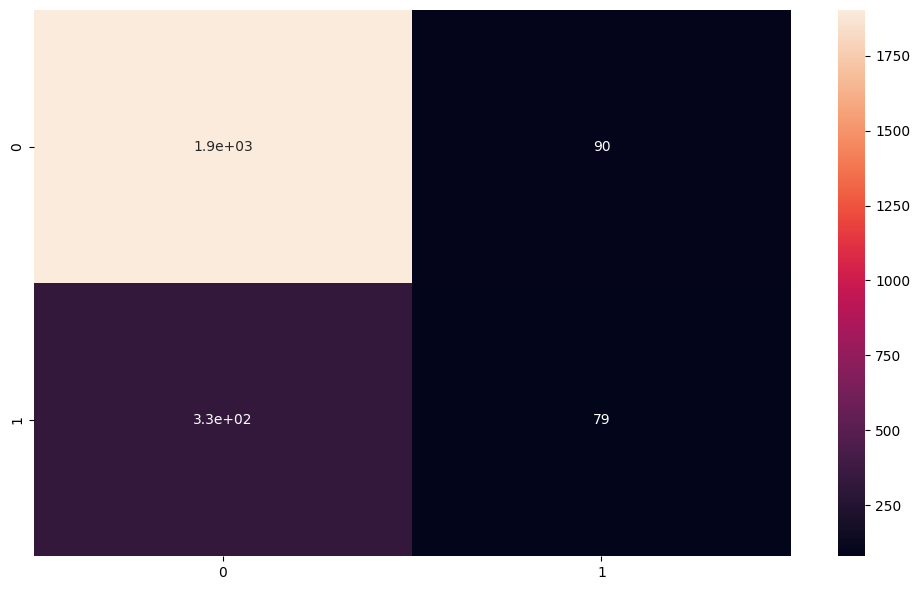

In [62]:
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True) #Plotting the heat map for the confusion matrix
plt.tight_layout()
plt.show()

In [63]:
column_names = dataFrame.columns
print(column_names)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'cat_IT', 'cat_RandD', 'cat_accounting',
       'cat_hr', 'cat_management', 'cat_marketing', 'cat_product_mng',
       'cat_sales', 'cat_support', 'cat_technical', 'cat_high', 'cat_low',
       'cat_medium'],
      dtype='object')


# K-Nearest Neighbours

In [64]:
import pandas as pd # Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X = dataFrame.drop(['left'], axis=1) # X contains all columns without left column
y = dataFrame['left'] # y contains the only left attribute
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Train-test split
scaler = StandardScaler() # Feature Scaling (important for KNN)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn_model = KNeighborsClassifier(n_neighbors=5)  # Set the appropriate value for 'n_neighbors'
knn_model.fit(X_train_scaled, y_train) # Model Training
y_pred = knn_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)  # Model Evaluation
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}") # Print results


Accuracy: 0.9508128386827845
Confusion Matrix:
[[1933   65]
 [  53  348]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1998
           1       0.84      0.87      0.86       401

    accuracy                           0.95      2399
   macro avg       0.91      0.92      0.91      2399
weighted avg       0.95      0.95      0.95      2399



# Naive Bayes

In [65]:
import pandas as pd #Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X = dataFrame.drop(['left'], axis=1)  # the target variable 'left' if it's included in the features
y = dataFrame['left'] #y contain only the left column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Train-test split
scaler = StandardScaler() # Feature Scaling (important for some Naive Bayes variants, but not for GaussianNB)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
nb_model = GaussianNB() # Model Training - Gaussian Naive Bayes
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test) # Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}") # Print results


Accuracy: 0.7749062109212171
Confusion Matrix:
[[1547  451]
 [  89  312]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.77      0.85      1998
           1       0.41      0.78      0.54       401

    accuracy                           0.77      2399
   macro avg       0.68      0.78      0.69      2399
weighted avg       0.86      0.77      0.80      2399



# Support Vector Machine

In [66]:
import pandas as pd # Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = dataFrame.drop(['left'], axis=1) # the target variable 'left' if it's included in the features
y = dataFrame['left'] #y contain only the left column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Train-test split
scaler = StandardScaler() # Feature Scaling (important for SVM)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # Model Training - Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', C=1.0, class_weight='balanced')  # Linear SVM, you can try different kernels and adjust C based on your data
svm_model.fit(X_train_scaled, y_train)

# Model Evaluation
y_pred = svm_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


Accuracy: 0.7694872863693205
Confusion Matrix:
[[1480  518]
 [  35  366]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.74      0.84      1998
           1       0.41      0.91      0.57       401

    accuracy                           0.77      2399
   macro avg       0.70      0.83      0.71      2399
weighted avg       0.88      0.77      0.80      2399



### Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier # form sklearn model importing the random forest classifier

In [68]:
ranForest = RandomForestClassifier(n_estimators=100)

In [69]:
ranForest.fit(X_train, y_train) #Intializing the randomForest Model

RandomForestClassifier()

In [70]:
ranForest_predictions = ranForest.predict(X_test)

In [71]:
accuracy_score(y_test, ranForest_predictions) #Predictiong the accuracy

0.9787411421425594

In [72]:
print(classification_report(y_test, ranForest_predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1998
           1       0.97      0.90      0.93       401

    accuracy                           0.98      2399
   macro avg       0.98      0.95      0.96      2399
weighted avg       0.98      0.98      0.98      2399



In [73]:
cm = confusion_matrix(y_test, ranForest_predictions) #confusion matrix for the y test and randomForest predictions

In [74]:
cm # Printing the confusion matrix

array([[1988,   10],
       [  41,  360]])

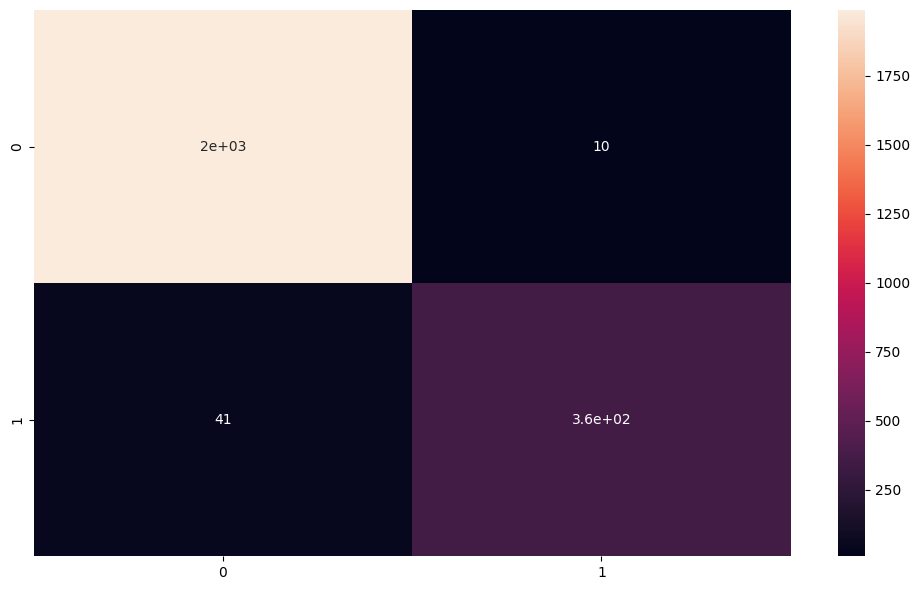

In [75]:
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True) # Plotting the heatmap for the confusion matrix
plt.tight_layout()
plt.show()